## 0 - Setup and data preparation
This cell loads libraries, the dataset, performs preprocessing, and basic feature engineering before the custom features.

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

data/by_polishing-00000-of-00001.parquet:   0%|          | 0.00/8.49M [00:00<?, ?B/s]

data/from_title-00000-of-00001.parquet:   0%|          | 0.00/6.90M [00:00<?, ?B/s]

data/from_title_and_content-00000-of-000(…):   0%|          | 0.00/7.01M [00:00<?, ?B/s]

Generating by_polishing split:   0%|          | 0/2851 [00:00<?, ? examples/s]

Generating from_title split:   0%|          | 0/2963 [00:00<?, ? examples/s]

Generating from_title_and_content split:   0%|          | 0/2574 [00:00<?, ? examples/s]

DatasetDict({
    by_polishing: Dataset({
        features: ['original_abstract', 'allam_generated_abstract', 'jais_generated_abstract', 'llama_generated_abstract', 'openai_generated_abstract'],
        num_rows: 2851
    })
    from_title: Dataset({
        features: ['original_abstract', 'allam_generated_abstract', 'jais_generated_abstract', 'llama_generated_abstract', 'openai_generated_abstract'],
        num_rows: 2963
    })
    from_title_and_content: Dataset({
        features: ['original_abstract', 'allam_generated_abstract', 'jais_generated_abstract', 'llama_generated_abstract', 'openai_generated_abstract'],
        num_rows: 2574
    })
})

Features in 'by_polishing':
{'original_abstract': Value('string'), 'allam_generated_abstract': Value('string'), 'jais_generated_abstract': Value('string'), 'llama_generated_abstract': Value('string'), 'openai_generated_abstract': Value('string')}

Dataset info for 'by_polishing':
Dataset({
    features: ['original_abstract', 'allam_generat

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


                                   original_abstract  \
0  كثيرا ما ارتبطت المصادر التاريخية في الأندلس خ...   
1  يعد العامل الثقافي احد ابرز الاسباب التي يعزى ...   
2  شكلت تلك الجهود والمساعي الرائدة التي قام بها ...   
3  يقوم المقال على اشكالية الضرائب الغير شرعية في...   
4  تعددت صور الحياة الثقافية و الفكرية و الأدبية ...   

                            allam_generated_abstract  \
0  يتناول هذا البحث موضوع نظام التعليم عند المرأة...   
1  يتناول هذا البحث دراسة خلفيات انهيار دولة المو...   
2  يتناول هذا البحث موضوع تسليح جيش التحرير الوطن...   
3  يتناول هذا البحث موضوع الضرائب غير الشرعية في ...   
4  يتناول هذا البحث تأثير السلطة العالمة في الإبد...   

                             jais_generated_abstract  \
0  تتناول هذه الدراسة نظام التعليم عند المرأة الأ...   
1  يعد العامل الثقافي أحد أبرز الأسباب التي أدت إ...   
2  للأسف، النص المقدم غير واضح وغير قابل للقراءة ...   
3  يناقش المقال مشكلة الضرائب غير الشرعية في مراح...   
4  تتناول هذه الدراسة تأثير السلطة العالمة على

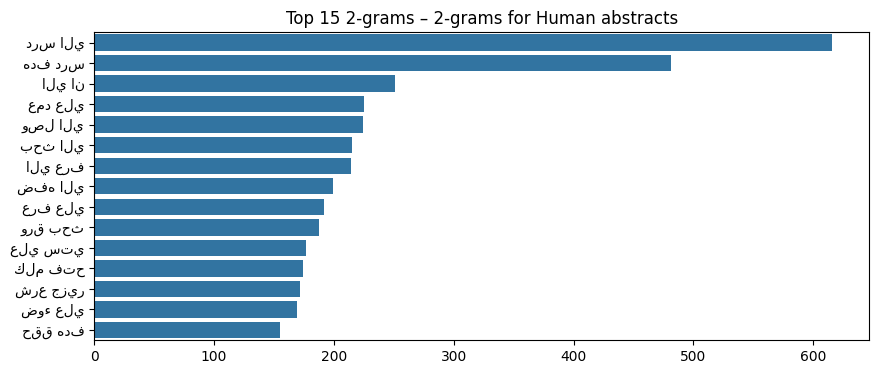


🔤 Top Bigrams for AI-generated abstracts:


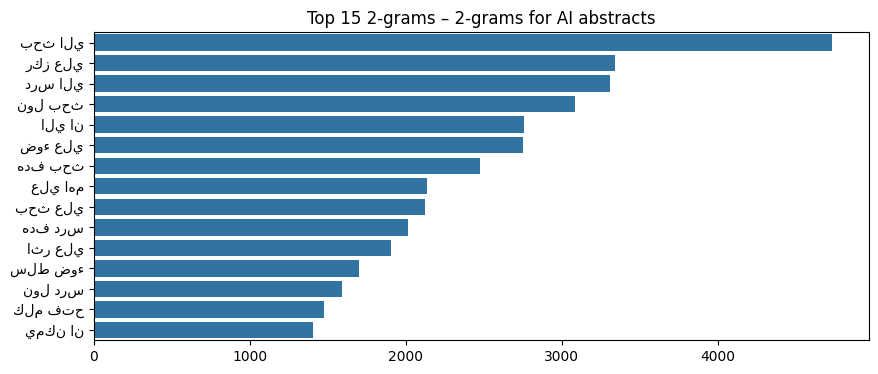

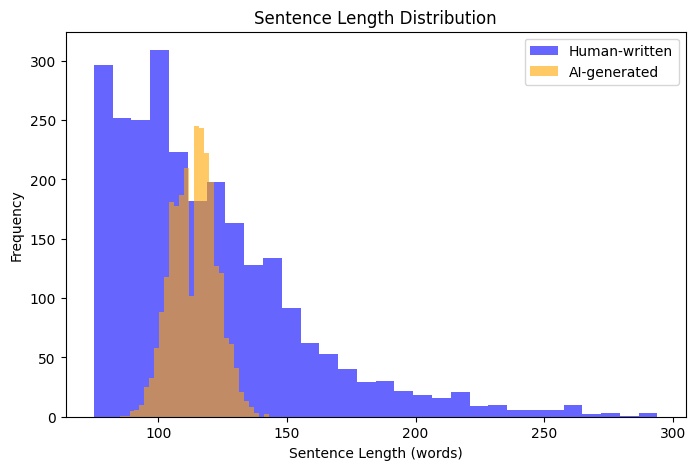

/tmp/ipython-input-1460892724.py:298: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df["human_ttr"], df["ai_ttr"]], labels=["Human", "AI"])


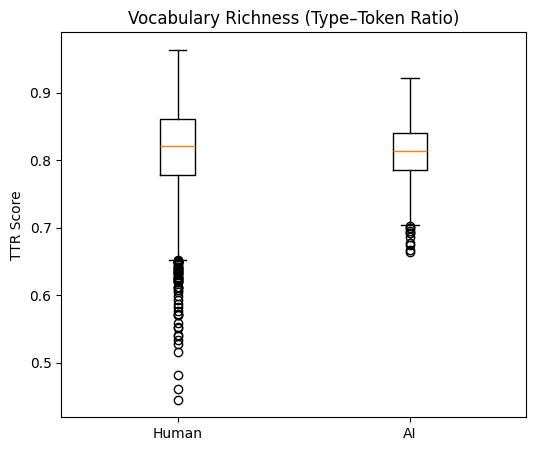

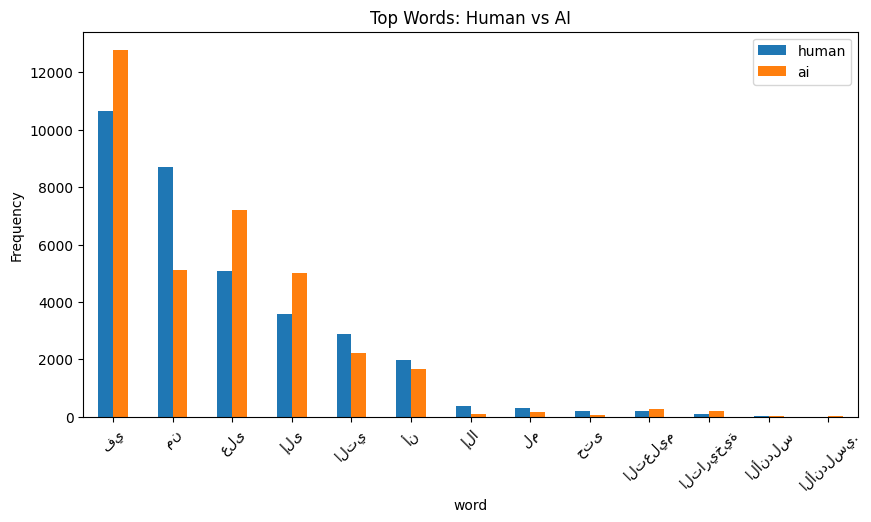

Final unified dataset shape: (41940, 4)
Index(['abstract_text', 'source_split', 'generated_by', 'label'], dtype='object')

Features in 'by_polishing':
{'original_abstract': Value('string'), 'allam_generated_abstract': Value('string'), 'jais_generated_abstract': Value('string'), 'llama_generated_abstract': Value('string'), 'openai_generated_abstract': Value('string')}

Dataset info for 'by_polishing':
Dataset({
    features: ['original_abstract', 'allam_generated_abstract', 'jais_generated_abstract', 'llama_generated_abstract', 'openai_generated_abstract'],
    num_rows: 2851
})

===== Target Variable Distribution =====
Human-written abstracts: 8388
AI-generated abstracts: 33552
Human %: 20.0
AI %: 80.0

===== Missing Values =====
abstract_text    0
source_split     0
generated_by     0
label            0
dtype: int64

===== Duplicate Rows =====
Total duplicate rows: 3

===== Duplicate values per column =====
abstract_text: 5415
source_split: 41937
generated_by: 41935
label: 41938

====

In [ ]:
# -*- coding: utf-8 -*-
"""Project.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1nCZClEDak_KN_ZUgPhhRQ3Bp8T3v4ywz

Task1-4
"""

# !pip install datasets
# !pip install python-dotenv

from dotenv import load_dotenv
import os
from huggingface_hub import login

load_dotenv()

hf_token = os.getenv("HF_TOKEN")
login(token=hf_token)

from datasets import load_dataset

# Login using e.g. `huggingface-cli login` to access this dataset
dataset = load_dataset("KFUPM-JRCAI/arabic-generated-abstracts")
print(dataset)

# Inspect column names and data types for one split (e.g., 'by_polishing')
print("\nFeatures in 'by_polishing':")
print(dataset['by_polishing'].features)

# Check dataset info (shape, structure, statistics)
print("\nDataset info for 'by_polishing':")
print(dataset['by_polishing'])

# Choose one split (e.g., by_polishing)
split1 = dataset["by_polishing"]

# Count human-written abstracts
num_human = len(split1["original_abstract"])

# Count AI-generated abstracts (4 per row)
num_ai = len(split1["allam_generated_abstract"]) \
       + len(split1["jais_generated_abstract"]) \
       + len(split1["llama_generated_abstract"]) \
       + len(split1["openai_generated_abstract"])

print("Number of human abstracts:", num_human)
print("Number of AI-generated abstracts:", num_ai)

# Distribution ratio
total = num_human + num_ai
print("Human %:", round(num_human / total * 100, 2))
print("AI %:", round(num_ai / total * 100, 2))

import pandas as pd
# Convert to pandas for easier checks
df = pd.DataFrame(split1)

# 1. Missing values
print("Missing values per column:")
print(df.isnull().sum())
print("_________________________________________")

# 2. Duplicates
print("\nNumber of duplicate rows:", df.duplicated().sum())

# Also check duplicates in each column separately
for col in df.columns:
    print(f"Duplicates in column {col}: {df[col].duplicated().sum()}")
print("_________________________________________")


# 3. Inconsistencies: empty strings or only spaces
for col in df.columns:
    empty_count = df[col].apply(lambda x: str(x).strip() == "").sum()
    print(f"Empty/blank values in column {col}: {empty_count}")

split2 = dataset["from_title"]

# Count human-written abstracts
num_human = len(split2["original_abstract"])

# Count AI-generated abstracts (4 per row)
num_ai = len(split2["allam_generated_abstract"]) \
       + len(split2["jais_generated_abstract"]) \
       + len(split2["llama_generated_abstract"]) \
       + len(split2["openai_generated_abstract"])

print("Number of human abstracts:", num_human)
print("Number of AI-generated abstracts:", num_ai)

# Distribution ratio
total = num_human + num_ai
print("Human %:", round(num_human / total * 100, 2))
print("AI %:", round(num_ai / total * 100, 2))

import pandas as pd
# Convert to pandas for easier checks
df = pd.DataFrame(split2)

# 1. Missing values
print("Missing values per column:")
print(df.isnull().sum())
print("_________________________________________")

# 2. Duplicates
print("\nNumber of duplicate rows:", df.duplicated().sum())

# Also check duplicates in each column separately
for col in df.columns:
    print(f"Duplicates in column {col}: {df[col].duplicated().sum()}")
print("_________________________________________")


# 3. Inconsistencies: empty strings or only spaces
for col in df.columns:
    empty_count = df[col].apply(lambda x: str(x).strip() == "").sum()
    print(f"Empty/blank values in column {col}: {empty_count}")

split3 = dataset["from_title_and_content"]

# Count human-written abstracts
num_human = len(split3["original_abstract"])

# Count AI-generated abstracts (4 per row)
num_ai = len(split3["allam_generated_abstract"]) \
       + len(split3["jais_generated_abstract"]) \
       + len(split3["llama_generated_abstract"]) \
       + len(split3["openai_generated_abstract"])

print("Number of human abstracts:", num_human)
print("Number of AI-generated abstracts:", num_ai)

# Distribution ratio
total = num_human + num_ai
print("Human %:", round(num_human / total * 100, 2))
print("AI %:", round(num_ai / total * 100, 2))

import pandas as pd
# Convert to pandas for easier checks
df = pd.DataFrame(split3)

# 1. Missing values
print("Missing values per column:")
print(df.isnull().sum())
print("_________________________________________")

# 2. Duplicates
print("\nNumber of duplicate rows:", df.duplicated().sum())

# Also check duplicates in each column separately
for col in df.columns:
    print(f"Duplicates in column {col}: {df[col].duplicated().sum()}")
print("_________________________________________")


# 3. Inconsistencies: empty strings or only spaces
for col in df.columns:
    empty_count = df[col].apply(lambda x: str(x).strip() == "").sum()
    print(f"Empty/blank values in column {col}: {empty_count}")

import re
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem.isri import ISRIStemmer
from datasets import load_dataset

# Download required NLTK resources
nltk.download('stopwords')

# Check columns
print(df.head())

#Define Arabic text cleaning functions
# Remove tashkeel (diacritics)
def remove_diacritics(text):
    arabic_diacritics = re.compile(r'[\u0617-\u061A\u064B-\u0652]')
    return re.sub(arabic_diacritics, '', text)

# Normalize Arabic text
def normalize_arabic(text):
    text = re.sub("[إأآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ؤ", "و", text)
    text = re.sub("ئ", "ي", text)
    text = re.sub("ة", "ه", text)
    text = re.sub("[^؀-ۿ ]+", " ", text)  # remove non-Arabic chars
    return text

# Initialize stopwords and stemmer
arabic_stopwords = set(stopwords.words("arabic"))
stemmer = ISRIStemmer()

# Full preprocessing pipeline
def preprocess_text(text):
    text = str(text)
    text = remove_diacritics(text)
    text = normalize_arabic(text)
    tokens = text.split()
    tokens = [w for w in tokens if w not in arabic_stopwords]
    tokens = [stemmer.stem(w) for w in tokens]
    return " ".join(tokens)

# Apply preprocessing
text_columns = [
    'original_abstract',
    'allam_generated_abstract',
    'jais_generated_abstract',
    'llama_generated_abstract',
    'openai_generated_abstract'
]
for col in text_columns:
    clean_col = col + "_clean"
    df[clean_col] = df[col].apply(preprocess_text)
print(" Preprocessing complete! Here are the new columns:")
print(df.columns)
df.head(2)

# Task 2.2: Exploratory Data Analysis (EDA)
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import seaborn as sns
import numpy as np

# Combine AI abstracts into one column
ai_texts = pd.concat([
    df['allam_generated_abstract_clean'],
    df['jais_generated_abstract_clean'],
    df['llama_generated_abstract_clean'],
    df['openai_generated_abstract_clean']
], axis=0).dropna().tolist()

human_texts = df['original_abstract_clean'].dropna().tolist()

# --- Statistical Analysis ---
def text_stats(texts):
    words = [w for txt in texts for w in txt.split()]
    avg_word_len = np.mean([len(w) for w in words])
    avg_sent_len = np.mean([len(txt.split()) for txt in texts])
    vocab = set(words)
    ttr = len(vocab) / len(words)
    return avg_word_len, avg_sent_len, ttr

stats_human = text_stats(human_texts)
stats_ai = text_stats(ai_texts)

print("\n Statistical Summary:")
print(f"Human-written: Avg word len={stats_human[0]:.2f}, Avg sent len={stats_human[1]:.2f}, TTR={stats_human[2]:.3f}")
print(f"AI-generated : Avg word len={stats_ai[0]:.2f}, Avg sent len={stats_ai[1]:.2f}, TTR={stats_ai[2]:.3f}")

# --- N-gram Frequency ---
def plot_top_ngrams(texts, n=2, top_k=15):
    from sklearn.feature_extraction.text import CountVectorizer
    vec = CountVectorizer(ngram_range=(n, n))
    bag = vec.fit_transform(texts)
    sum_words = bag.sum(axis=0)
    freqs = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    freqs = sorted(freqs, key=lambda x: x[1], reverse=True)[:top_k]
    words, counts = zip(*freqs)
    plt.figure(figsize=(10,4))
    sns.barplot(x=list(counts), y=list(words))
    plt.title(f"Top {top_k} {n}-grams – {n}-grams for {'Human' if texts==human_texts else 'AI'} abstracts")
    plt.show()

print("\n🔤 Top Bigrams for Human-written abstracts:")
plot_top_ngrams(human_texts, n=2)

print("\n🔤 Top Bigrams for AI-generated abstracts:")
plot_top_ngrams(ai_texts, n=2)

import matplotlib.pyplot as plt

df["human_length"] = df["original_abstract"].apply(lambda x: len(x.split()))
df["ai_length"] = df["openai_generated_abstract"].apply(lambda x: len(x.split()))

plt.figure(figsize=(8,5))
plt.hist(df["human_length"], bins=30, alpha=0.6, label="Human-written", color='blue')
plt.hist(df["ai_length"], bins=30, alpha=0.6, label="AI-generated", color='orange')
plt.xlabel("Sentence Length (words)")
plt.ylabel("Frequency")
plt.title("Sentence Length Distribution")
plt.legend()
plt.show()

def type_token_ratio(text):
    words = text.split()
    return len(set(words)) / len(words) if words else 0

df["human_ttr"] = df["original_abstract"].apply(type_token_ratio)
df["ai_ttr"] = df["openai_generated_abstract"].apply(type_token_ratio)

plt.figure(figsize=(6,5))
plt.boxplot([df["human_ttr"], df["ai_ttr"]], labels=["Human", "AI"])
plt.title("Vocabulary Richness (Type–Token Ratio)")
plt.ylabel("TTR Score")
plt.show()

from collections import Counter
import pandas as pd

human_words = " ".join(df["original_abstract"]).split()
ai_words = " ".join(df["openai_generated_abstract"]).split()

human_freq = Counter(human_words)
ai_freq = Counter(ai_words)

common_words = set(list(human_freq.keys())[:100]) & set(list(ai_freq.keys())[:100])

data = []
for w in common_words:
    data.append((w, human_freq[w], ai_freq[w]))

freq_df = pd.DataFrame(data, columns=["word", "human", "ai"]).sort_values("human", ascending=False)[:15]

freq_df.plot(x="word", kind="bar", figsize=(10,5), title="Top Words: Human vs AI", rot=45)
plt.ylabel("Frequency")
plt.show()

# Combine all splits into one df_human
splits = ["by_polishing", "from_title", "from_title_and_content"]

df_human = pd.concat([dataset[s].to_pandas() for s in splits], ignore_index=True)

dfs = []

for split_name in ["by_polishing", "from_title", "from_title_and_content"]:
    split_df = dataset[split_name].to_pandas().copy()
    split_df["source_split"] = split_name   # <-- Create column manually
    dfs.append(split_df)

df_human = pd.concat(dfs, ignore_index=True)

ai_rows = []

for _, row in df_human.iterrows():
    ai_models = [
        ("allam", row["allam_generated_abstract"]),
        ("jais", row["jais_generated_abstract"]),
        ("llama", row["llama_generated_abstract"]),
        ("openai", row["openai_generated_abstract"]),
    ]

    for model_name, text in ai_models:
        ai_rows.append({
            "abstract_text": text,
            "source_split": row["source_split"],     # now this exists
            "generated_by": model_name,
            "label": 0  # AI
        })

# Convert to dataframe
df_ai = pd.DataFrame(ai_rows)

# Create human dataframe
df_h = pd.DataFrame({
    "abstract_text": df_human["original_abstract"],
    "source_split": df_human["source_split"],
    "generated_by": "human",
    "label": 1
})

# Final unified dataset
df = pd.concat([df_h, df_ai], ignore_index=True)

print("Final unified dataset shape:", df.shape)
df.head(10)

print(df.columns)

# Inspect column names and data types for one split (e.g., 'by_polishing')
print("\nFeatures in 'by_polishing':")
print(dataset['by_polishing'].features)

# Check dataset info (shape, structure, statistics)
print("\nDataset info for 'by_polishing':")
print(dataset['by_polishing'])

num_human = df[df["label"] == 1].shape[0]
num_ai = df[df["label"] == 0].shape[0]

total = num_human + num_ai

print("\n===== Target Variable Distribution =====")
print("Human-written abstracts:", num_human)
print("AI-generated abstracts:", num_ai)
print("Human %:", round(num_human / total * 100, 2))
print("AI %:", round(num_ai / total * 100, 2))

print("\n===== Missing Values =====")
print(df.isnull().sum())

print("\n===== Duplicate Rows =====")
print("Total duplicate rows:", df.duplicated().sum())

print("\n===== Duplicate values per column =====")
for col in df.columns:
    print(f"{col}: {df[col].duplicated().sum()}")

print("\n===== Empty / Blank Values =====")
for col in df.columns:
    empty_count = df[col].apply(lambda x: str(x).strip() == "").sum()
    print(f"{col}: {empty_count}")

# Check columns
print(df.head())

#Define Arabic text cleaning functions
# Remove tashkeel (diacritics)
def remove_diacritics(text):
    arabic_diacritics = re.compile(r'[\u0617-\u061A\u064B-\u0652]')
    return re.sub(arabic_diacritics, '', text)

# Normalize Arabic text
def normalize_arabic(text):
    text = re.sub("[إأآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ؤ", "و", text)
    text = re.sub("ئ", "ي", text)
    text = re.sub("ة", "ه", text)
    text = re.sub("[^؀-ۿ ]+", " ", text)  # remove non-Arabic chars
    return text

# Initialize stopwords and stemmer
arabic_stopwords = set(stopwords.words("arabic"))
stemmer = ISRIStemmer()

# Full preprocessing pipeline
def preprocess_text(text):
    text = str(text)
    text = remove_diacritics(text)
    text = normalize_arabic(text)
    tokens = text.split()
    tokens = [w for w in tokens if w not in arabic_stopwords]
    tokens = [stemmer.stem(w) for w in tokens]
    return " ".join(tokens)

# Apply preprocessing
text_columns = [
    'abstract_text',
    'source_split',
    'generated_by',
    'label',
]

# Apply preprocessing on the unified abstract text column
df["abstract_text_clean"] = df["abstract_text"].apply(preprocess_text)

print("Preprocessing complete! Here are the new columns:")
print(df.columns)

df.head(2)

"""**FEATURES:**"""

#important library
import re
import math
import numpy as np
import pandas as pd
import unicodedata
from collections import Counter
from datasets import load_dataset
import regex as re2

#Helper functions


def simple_word_tokenize(text):
    """
    Tokenize text into words / symbols with Arabic support.
    """
    return re2.findall(r"\p{Arabic}+|\w+|[^\s\w]", text, flags=re2.VERSION1)

def sentence_tokenize(text):
    """
    Split text into sentences using Arabic/English punctuation.
    """
    if not isinstance(text, str):
        return []
    parts = re.split(r'(?<=[\.\?\!\u061F\u061B])\s+', text)
    return [p.strip() for p in parts if p.strip()]

def paragraph_tokenize(text):
    """
    Split text into paragraphs based on double newlines.
    """
    if not isinstance(text, str):
        return []
    paragraphs = re.split(r'\s*\n\s*\n\s*|\s*\r\n\s*\r\n\s*', text.strip())
    return [p.strip() for p in paragraphs if p.strip()]

# Column names to use
original_text_columns = "abstract_text"
clean_text_columns = "abstract_text_clean"

# =============================
# 1. Tokens (use clean text)
# =============================
df["tokens"] = df[clean_text_columns].apply(
    lambda t: [tok for tok in simple_word_tokenize(t) if tok.strip()] if isinstance(t, str) else []
)

# =============================
# 2. Words (use clean tokens only)
# =============================
df["words"] = df["tokens"].apply(
    lambda toks: [tok for tok in toks if re.search(r'\w', tok)]
)

# =============================
# 3. Sentences (use original_text_columns for accurate sentence boundary detection)
# =============================
df["sentences"] = df[original_text_columns].apply(
    lambda t: sentence_tokenize(t)
)

# =============================
# 4. Paragraphs (use original_text_columns to preserve original structural breaks)
# =============================
df["paragraphs"] = df[original_text_columns].apply(
    lambda t: paragraph_tokenize(t)
)

print("Feature engineering completed! Columns now:")
print(df.columns)
df.head(2)

# Column names to use
original_text_columns = "abstract_text"
clean_text_columns = "abstract_text_clean"


## 1 - Feature 12: Number of short words / N

In [ ]:
# Feature 12: Number of short words / N
feature_name = f'{clean_text_columns}_f012_num_short_words_over_N'

def _short_word_ratio(words, max_length=2):
    """Calculates the ratio of words shorter than or equal to max_length to the total number of words."""
    total_words = len(words)
    if total_words == 0:
        return 0.0

    # Count words where length is less than or equal to the defined maximum
    short_words_count = sum(1 for w in words if len(w) <= max_length)

    return float(short_words_count) / total_words

df[feature_name] = df["words"].apply(_short_word_ratio)

df.head(5)


,abstract_text,source_split,generated_by,label,abstract_text_clean,tokens,words,sentences,paragraphs,abstract_text_clean_f012_num_short_words_over_N
0,كثيرا ما ارتبطت المصادر التاريخية في الأندلس خ...,by_polishing,human,1,ربط صدر ارخ دلس خصه كتب رجم هرس رمج وغر درس حي...,"[ربط, صدر, ارخ, دلس, خصه, كتب, رجم, هرس, رمج, ...","[ربط, صدر, ارخ, دلس, خصه, كتب, رجم, هرس, رمج, ...",[كثيرا ما ارتبطت المصادر التاريخية في الأندلس ...,[كثيرا ما ارتبطت المصادر التاريخية في الأندلس ...,0.031915
1,يعد العامل الثقافي احد ابرز الاسباب التي يعزى ...,by_polishing,human,1,يعد عمل ثقف احد برز سبب يعز سقط دول وحد ، حتي ...,"[يعد, عمل, ثقف, احد, برز, سبب, يعز, سقط, دول, ...","[يعد, عمل, ثقف, احد, برز, سبب, يعز, سقط, دول, ...",[يعد العامل الثقافي احد ابرز الاسباب التي يعزى...,[يعد العامل الثقافي احد ابرز الاسباب التي يعزى...,0.019048
2,شكلت تلك الجهود والمساعي الرائدة التي قام بها ...,by_polishing,human,1,شكل جهد سعي ريد قده ثور خلل رحل اول بحث صدر مو...,"[شكل, جهد, سعي, ريد, قده, ثور, خلل, رحل, اول, ...","[شكل, جهد, سعي, ريد, قده, ثور, خلل, رحل, اول, ...",[شكلت تلك الجهود والمساعي الرائدة التي قام بها...,[شكلت تلك الجهود والمساعي الرائدة التي قام بها...,0.040000
3,يقوم المقال على اشكالية الضرائب الغير شرعية في...,by_polishing,human,1,يقم قال علي شكل ضريب غير شرع خلف رحل دول ربط و...,"[يقم, قال, علي, شكل, ضريب, غير, شرع, خلف, رحل,...","[يقم, قال, علي, شكل, ضريب, غير, شرع, خلف, رحل,...",[يقوم المقال على اشكالية الضرائب الغير شرعية ف...,[يقوم المقال على اشكالية الضرائب الغير شرعية ف...,0.073684
4,تتفق المصادر التاريخية المتوفرة حول موضوع تطور...,by_polishing,human,1,تفق صدر ارخ توفر حول وضع تطر حرك وطن جزير نهي ...,"[تفق, صدر, ارخ, توفر, حول, وضع, تطر, حرك, وطن,...","[تفق, صدر, ارخ, توفر, حول, وضع, تطر, حرك, وطن,...",[تتفق المصادر التاريخية المتوفرة حول موضوع تطو...,[تتفق المصادر التاريخية المتوفرة حول موضوع تطو...,0.036697


## 2 - Feature 35: Total number of paragraphs (P)

In [ ]:
# 35. Total number of paragraphs (P)
df['f035_Total_number_of_paragraphs_(P)'] = df["paragraphs"].apply(len)

df.head(5)


,abstract_text,source_split,generated_by,label,abstract_text_clean,tokens,words,sentences,paragraphs,abstract_text_clean_f012_num_short_words_over_N,f035_Total_number_of_paragraphs_(P)
0,كثيرا ما ارتبطت المصادر التاريخية في الأندلس خ...,by_polishing,human,1,ربط صدر ارخ دلس خصه كتب رجم هرس رمج وغر درس حي...,"[ربط, صدر, ارخ, دلس, خصه, كتب, رجم, هرس, رمج, ...","[ربط, صدر, ارخ, دلس, خصه, كتب, رجم, هرس, رمج, ...",[كثيرا ما ارتبطت المصادر التاريخية في الأندلس ...,[كثيرا ما ارتبطت المصادر التاريخية في الأندلس ...,0.031915,1
1,يعد العامل الثقافي احد ابرز الاسباب التي يعزى ...,by_polishing,human,1,يعد عمل ثقف احد برز سبب يعز سقط دول وحد ، حتي ...,"[يعد, عمل, ثقف, احد, برز, سبب, يعز, سقط, دول, ...","[يعد, عمل, ثقف, احد, برز, سبب, يعز, سقط, دول, ...",[يعد العامل الثقافي احد ابرز الاسباب التي يعزى...,[يعد العامل الثقافي احد ابرز الاسباب التي يعزى...,0.019048,1
2,شكلت تلك الجهود والمساعي الرائدة التي قام بها ...,by_polishing,human,1,شكل جهد سعي ريد قده ثور خلل رحل اول بحث صدر مو...,"[شكل, جهد, سعي, ريد, قده, ثور, خلل, رحل, اول, ...","[شكل, جهد, سعي, ريد, قده, ثور, خلل, رحل, اول, ...",[شكلت تلك الجهود والمساعي الرائدة التي قام بها...,[شكلت تلك الجهود والمساعي الرائدة التي قام بها...,0.040000,1
3,يقوم المقال على اشكالية الضرائب الغير شرعية في...,by_polishing,human,1,يقم قال علي شكل ضريب غير شرع خلف رحل دول ربط و...,"[يقم, قال, علي, شكل, ضريب, غير, شرع, خلف, رحل,...","[يقم, قال, علي, شكل, ضريب, غير, شرع, خلف, رحل,...",[يقوم المقال على اشكالية الضرائب الغير شرعية ف...,[يقوم المقال على اشكالية الضرائب الغير شرعية ف...,0.073684,1
4,تتفق المصادر التاريخية المتوفرة حول موضوع تطور...,by_polishing,human,1,تفق صدر ارخ توفر حول وضع تطر حرك وطن جزير نهي ...,"[تفق, صدر, ارخ, توفر, حول, وضع, تطر, حرك, وطن,...","[تفق, صدر, ارخ, توفر, حول, وضع, تطر, حرك, وطن,...",[تتفق المصادر التاريخية المتوفرة حول موضوع تطو...,[تتفق المصادر التاريخية المتوفرة حول موضوع تطو...,0.036697,1


## 3 - Feature 58: Number of words among the top-100 most frequent words

In [ ]:
# 58. Number of words found in the 100 most frequent positions
# (approximation using global frequency over the clean words column)

from collections import Counter

# حساب الترددات على عمود الكلمات الموحد "words"
all_words = []
for words_list in df["words"]:
    if isinstance(words_list, list):
        all_words.extend(words_list)

counter = Counter(all_words)
top100_words = set([w for w, _ in counter.most_common(100)])  # Top 100 كلمات

# لحساب Feature 58
# ------------------------------
def count_top100_embedding_words(tokens, top_words_set=top100_words):
    if not isinstance(tokens, list):
        return 0
    return sum(1 for tok in tokens if tok in top_words_set)

# تطبيق Feature 58 على عمود الكلمات الموحد
feature_58_name = f'{clean_text_columns}_f058_num_top100_embedding_words'
df[feature_58_name] = df["words"].apply(count_top100_embedding_words)

# لفحص نتائج ميزة 58
df[["words", feature_58_name]].head()

!pip install transformers -q


## 4 - Feature 81: Language-model-based LogRank score

In [8]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM
import pandas as pd

# تأكد إنك ثبّتت transformers في خلية فوق:
# !pip install transformers -q

model_name = "distilgpt2"  # نسخة أخف من gpt2
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)
model.eval()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

def compute_logrank(text):
    if not isinstance(text, str) or not text.strip():
        return 0.0

    inputs = tokenizer(
        text,
        return_tensors="pt",
        truncation=True,
        max_length=128  # قلّل الطول عشان السرعة
    )
    input_ids = inputs["input_ids"].to(device)

    with torch.no_grad():
        outputs = model(input_ids, labels=input_ids)
        log_rank_score = outputs.loss.item()

    return log_rank_score

# نجهز العمود
feature_81_name = f"{clean_text_columns}_f081_logrank"

values = []
max_rows = 1000   # نحسب لأول 1000 عينة فقط، والباقي نخليه 0
for i, t in enumerate(df[clean_text_columns]):
    if i < max_rows and pd.notna(t):
        values.append(compute_logrank(t))
    else:
        values.append(0.0)

df[feature_81_name] = values

df[[feature_81_name]].head()

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/762 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/353M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

`loss_type=None` was set in the config but it is unrecognized. Using the default loss: `ForCausalLMLoss`.


,abstract_text_clean_f081_logrank
0,2.754347
1,2.614764
2,2.557950
3,2.541200
4,2.668791


## 5 - Feature 104: Root Pattern Frequency

In [ ]:
# 104. Root Pattern Frequency
# يقيس استخدام أنماط الجذور العربية (مثل "فعل"، "مفعول") بطريقة مبسطة.

root_patterns = ["فعل", "افعال", "مفعول", "فاعلة"]  # مثال لأنماط جذور

def root_pattern_frequency(text):
    if not isinstance(text, str) or len(text.strip()) == 0:
        return 0.0
    count = sum(text.count(pattern) for pattern in root_patterns)
    total_words = len(simple_word_tokenize(text))
    return count / total_words if total_words > 0 else 0.0

feature_104_name = f"{original_text_columns}_f104_root_pattern_freq"
df[feature_104_name] = df[original_text_columns].apply(root_pattern_frequency)


## 6 - Train/Validation/Test split and model training

TOTAL: 41940
TRAIN: 29358
VAL: 6291
TEST: 6291
TF-IDF shapes:
Train: (29358, 5000)
Validation: (6291, 5000)
Test: (6291, 5000)
X and y are ready for ML models.
Train: (29358, 5004) (29358,)
Validation: (6291, 5004) (6291,)
Test: (6291, 5004) (6291,)
Validation Accuracy: 0.9643935781274837

Classification Report (Validation):
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      4977
           1       0.94      0.89      0.91      1314

    accuracy                           0.96      6291
   macro avg       0.95      0.94      0.95      6291
weighted avg       0.96      0.96      0.96      6291

Test Accuracy: 0.9653473215704975

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      4978
           1       0.93      0.90      0.92      1313

    accuracy                           0.97      6291
   macro avg       0.95      0.94      0.95      6291
weighted 

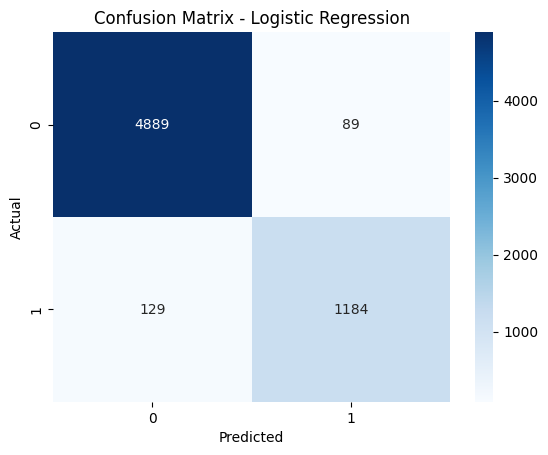

SVM Validation Accuracy: 0.975520584962645
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      4977
           1       0.93      0.96      0.94      1314

    accuracy                           0.98      6291
   macro avg       0.96      0.97      0.96      6291
weighted avg       0.98      0.98      0.98      6291

Random Forest Validation Accuracy: 0.9766332856461611
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4977
           1       0.97      0.92      0.94      1314

    accuracy                           0.98      6291
   macro avg       0.97      0.96      0.96      6291
weighted avg       0.98      0.98      0.98      6291



/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [09:02:04] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [ ]:
"""#Split the data"""

from sklearn.model_selection import train_test_split

# First split: Train 70%, Temp 30%
train_df, temp_df = train_test_split(df, test_size=0.30, random_state=42, shuffle=True)

# Second split: Temp 30% → 15% Validation, 15% Test
val_df, test_df = train_test_split(temp_df, test_size=0.50, random_state=42, shuffle=True)

# Show sizes
print("TOTAL:", len(df))
print("TRAIN:", len(train_df))
print("VAL:", len(val_df))
print("TEST:", len(test_df))

"""#TF-IDF Features from Cleaned Text

"""

#apply with abstract_text_clean only
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF vectorizer for Arabic text
tfidf_vectorizer = TfidfVectorizer(
    max_features=5000,   # limit vocabulary
    ngram_range=(1,2),   # unigrams + bigrams
    analyzer='word'
)

# Fit only on training set
tfidf_vectorizer.fit(train_df["abstract_text_clean"])

# Transform train/validation/test sets
X_train_tfidf = tfidf_vectorizer.transform(train_df["abstract_text_clean"])
X_val_tfidf   = tfidf_vectorizer.transform(val_df["abstract_text_clean"])
X_test_tfidf  = tfidf_vectorizer.transform(test_df["abstract_text_clean"])

print("TF-IDF shapes:")
print("Train:", X_train_tfidf.shape)
print("Validation:", X_val_tfidf.shape)
print("Test:", X_test_tfidf.shape)

"""##Define X and y"""

from scipy.sparse import hstack

#Select numeric features (The generated feature engineering exclude label and text)
EXCLUDED_COLS = ['label', 'abstract_text', 'abstract_text_clean',
                 'tokens', 'words', 'sentences', 'paragraphs', 'abstract_text_pos_tags']
# Select columns that are numeric AND not in the exclusion list>>feature engineering columns
numeric_cols = [
    col for col in train_df.select_dtypes(include=np.number).columns.tolist()
    if col not in EXCLUDED_COLS
]
# Convert the numeric features DataFrames to NumPy arrays (dense matrices)
# We must use the values/to_numpy() method to extract the array for sparse matrix stacking.
X_train_num_array = train_df[numeric_cols].values
X_val_num_array   = val_df[numeric_cols].values
X_test_num_array  = test_df[numeric_cols].values


# Target variable
y_train = train_df["label"]
y_val   = val_df["label"]
y_test  = test_df["label"]

# Features: TF-IDF and the creating feature engineering
X_train = hstack([X_train_tfidf, X_train_num_array]).tocsr()
X_val= hstack([X_val_tfidf, X_val_num_array]).tocsr()
X_test= hstack([X_test_tfidf, X_test_num_array]).tocsr()

print("X and y are ready for ML models.")
print("Train:", X_train.shape, y_train.shape)
print("Validation:", X_val.shape, y_val.shape)
print("Test:", X_test.shape, y_test.shape)

"""#Build Machine learning Models

##1-Baseline Model (Naïve Bayes & Logistic Regression)
"""

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the model
lr_model = LogisticRegression(max_iter=1000, random_state=42)

# Train on training set
lr_model.fit(X_train, y_train)

# Predict on validation set
y_val_pred = lr_model.predict(X_val)

# Evaluate on validation set
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("\nClassification Report (Validation):")
print(classification_report(y_val, y_val_pred))

# Evaluation
# Predict on test set
y_test_pred = lr_model.predict(X_test)

# Evaluate on test set
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nClassification Report (Test):")
print(classification_report(y_test, y_test_pred))

# Optional: confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

"""##2-Traditional Machine Learning Models ( Support Vector Machine (SVM), Random Forest, XGBoost)using the validation set"""

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Dictionary to store models and results
models = {}

# -----------------------
#Support Vector Machine (SVM)
# -----------------------
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train, y_train)

y_val_pred_svm = svm_model.predict(X_val)
print("SVM Validation Accuracy:", accuracy_score(y_val, y_val_pred_svm))
print(classification_report(y_val, y_val_pred_svm))

models['SVM'] = svm_model

# -----------------------
#Random Forest
# -----------------------
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)

y_val_pred_rf = rf_model.predict(X_val)
print("Random Forest Validation Accuracy:", accuracy_score(y_val, y_val_pred_rf))
print(classification_report(y_val, y_val_pred_rf))

models['RandomForest'] = rf_model

# -----------------------
#XGBoost
xgb_model = xgb.XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    n_jobs=-1
)
xgb_model.fit(X_train, y_train)

y_val_pred_xgb = xgb_model.predict(X_val)
print("XGBoost Validation Accuracy:", accuracy_score(y_val, y_val_pred_xgb))
print(classification_report(y_val, y_val_pred_xgb))

models['XGBoost'] = xgb_model

#Evaluation
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# List of models to evaluate
model_names = ['SVM', 'RandomForest', 'XGBoost']

for name in model_names:
    model = models[name]

    # Predict on test set
    y_test_pred = model.predict(X_test)

    print(f"\n===== {name} Test Evaluation =====")
    print("Accuracy:", accuracy_score(y_test, y_test_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_test_pred))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

"""#Build Deep learning Models

Build neural network classifier ( simple Feedforward Network) on top of the extracted BERT embeddings or fine-tune the pre-trained BERT model for the classification task.

#Step1: Extract BERT Embeddings (Sentence-level)
"""

!pip install sentence-transformers

from sentence_transformers import SentenceTransformer
import numpy as np

# Load Arabic-compatible BERT model
bert_model = SentenceTransformer("sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2")

# Convert clean_text into embeddings
X_train_emb = bert_model.encode(train_df["clean_text"].tolist(), convert_to_numpy=True)
X_val_emb   = bert_model.encode(val_df["clean_text"].tolist(), convert_to_numpy=True)
X_test_emb  = bert_model.encode(test_df["clean_text"].tolist(), convert_to_numpy=True)

y_train = train_df["label"].values
y_val   = val_df["label"].values
y_test  = test_df["label"].values

print("Train embedding shape:", X_train_emb.shape)

"""##Step 2: Build a Feedforward Neural Network"""

#import tensorflow as tf
from tensorflow.keras import layers, models

# Basic feedforward classifier on embeddings
ffnn_model = models.Sequential([
    layers.Input(shape=(X_train_emb.shape[1],)),
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(1, activation="sigmoid")   # binary classification
])

ffnn_model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

ffnn_model.summary()

"""##Step3: Train the Model"""

history = ffnn_model.fit(
    X_train_emb, y_train,
    validation_data=(X_val_emb, y_val),
    epochs=10,
    batch_size=32
)

"""##Step 4: Evaluate on Test Set

"""

from sklearn.metrics import accuracy_score, classification_report

# Predict
y_test_pred = (ffnn_model.predict(X_test_emb) > 0.5).astype(int)

print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

"""##Save Models"""

import os
import joblib
from tensorflow.keras.models import Model as KerasModel

def save_all_models(models_dict, save_dir="models"):
    """
    Saves all ML/DL models to disk based on their type.

    Parameters:
    -----------
    models_dict : dict
        Example:
            {
                "logistic_regression": log_reg_model,
                "svm": svm_model,
                "random_forest": rf_model,
                "xgboost": xgb_model,
                "ffnn": ffnn_model
            }

    save_dir : str
        Directory where models will be saved.
    """

    # Create save folder
    os.makedirs(save_dir, exist_ok=True)

    for model_name, model_obj in models_dict.items():

        # Case 1 — Keras deep learning model
        if isinstance(model_obj, KerasModel):
            file_path = os.path.join(save_dir, f"{model_name}.h5")
            model_obj.save(file_path)
            print(f"[Saved] Keras model → {file_path}")

        # Case 2 — All pickle-compatible models (Sklearn, XGBoost)
        else:
            file_path = os.path.join(save_dir, f"{model_name}.pkl")
            joblib.dump(model_obj, file_path)
            print(f"[Saved] Pickle model → {file_path}")

    print("\nAll models saved successfully!")

import os
os.makedirs("models", exist_ok=True)
models_dict = {
    "lr_model": lr_model,
    "svm": svm_model,
    "random_forest": rf_model,
    "xgboost": xgb_model,
    "ffnn": ffnn_model
}

save_all_models(models_dict)